# Практическая работа № 2

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import plotly.graph_objs as go
import plotly.express as px

### Задание 1

In [3]:
dataset = pd.read_csv('goldprices.csv', sep=',')
dataset.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


### Задание 2

In [4]:
dataset.info() # Вывод информации о датасете
dataset.isna().sum() # Проверяем наличие пропущенных данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


Date             0
Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

### Задание 3

In [5]:
plot = go.Figure() # Создаем полотно

plot.add_trace(go.Bar(x = dataset['Date'], y = dataset['Gold_Price'],
                      marker=dict(color = dataset['Gold_Price'], coloraxis = 'coloraxis', line = dict(color = "black", width =2))
))

plot.update_layout(
    width = None, height = 700,
    margin = dict(l = 0,r = 0,t =50, b = 0),
    title = {'text': "Динамица цены золота на бирже", 'font_size': 20, 'x': 0.5, "y": 0.97 ,'xanchor': 'center', 'yanchor': 'top'},
    xaxis = dict(title = "Дата", title_font_size = 16, tickfont_size = 14, gridwidth = 2, gridcolor = 'ivory', tickangle = 315),
    yaxis = dict(title = "Цена", title_font_size = 16, tickfont_size = 14, gridwidth = 2, gridcolor = 'ivory')
)
plot.show()

### Задание 4

In [6]:
plot = go.Figure()
new_dates = pd.to_datetime(dataset["Date"]).dt.year
grouped_values = dataset.groupby(new_dates)['Gold_Price'].mean()

plot.add_trace(go.Pie(labels = grouped_values.index, values = grouped_values, 
                      marker=dict(line = dict(color = "black", width = 2))))

plot.update_layout(width = None, height = 700,
    margin = dict(l = 0,r = 150,t =50, b = 0),
    title = {'text': "Динамица цены золота на бирже", 'font_size': 20, 'x': 0.47, "y": 0.97 ,'xanchor': 'center', 'yanchor': 'top'},
)



### Задание 5

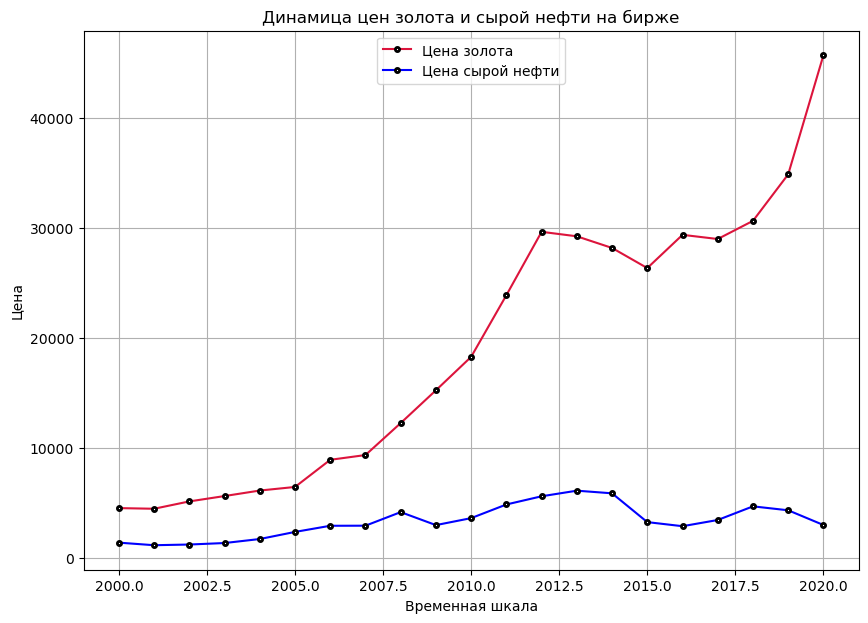

In [7]:
grouped_second_values = dataset.groupby(new_dates)['Crude_Oil'].mean()

#%%
plot = plt.figure('График', figsize=(10,7))
plt.grid(True)
params = {"lines.marker": '.',
        "lines.markerfacecolor": 'white',
        "lines.markeredgecolor": 'black',
        "lines.markeredgewidth": 2,
        "grid.linewidth": 2,
        "grid.color": 'mistyrose',
}

plt.rcParams.update(params)
plt.plot(grouped_values.index,
         grouped_values,
         label = "Цена золота",
         color = "crimson",
         )
plt.plot(grouped_second_values.index,
         grouped_second_values,
         label = "Цена сырой нефти",
         color = "blue",
)

plt.xlabel("Временная шкала")
plt.ylabel("Цена")
plt.title("Динамица цен золота и сырой нефти на бирже")
plt.legend(loc='upper center')

plt.show()

### Задание 6

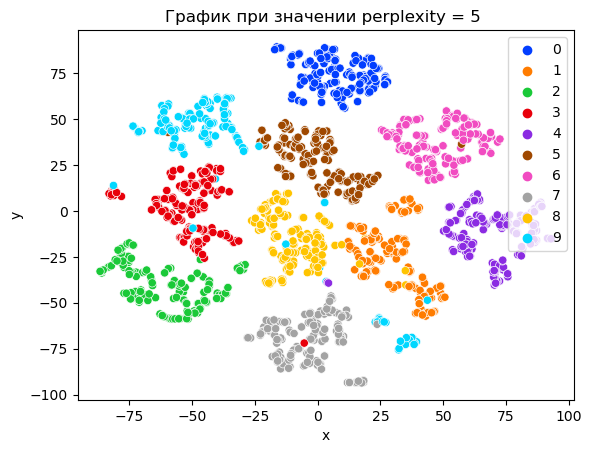

Рассчитано за 2.879025936126709 секунд 


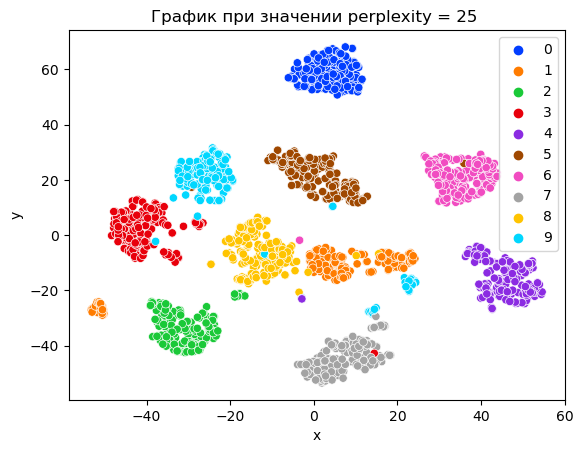

Рассчитано за 3.625394582748413 секунд 


In [31]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_digits
import time

ds = load_digits(as_frame=True)
ds.data
perplexity_list = [5,25]

scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(ds.data), columns=ds.data.columns)
D
def generate_t(perplexity_value):
    T = TSNE(n_components=2, perplexity=perplexity_value, random_state=123)
    TSNE_features = T.fit_transform(D)
    TSNE_features[1:4, :]
    return TSNE_features

for i in range(len(perplexity_list)):
    start_time = time.time()

    TSNE_features = generate_t(perplexity_list[i])
    Data = D.copy()
    Data['x'] = TSNE_features[:,0]
    Data['y'] = TSNE_features[:,1]

    #%%
    fig = plt.figure()
    sns.scatterplot(x='x', y='y', hue= ds.frame['target'], data=Data, palette='bright')
    plt.title("График при значении perplexity = {0} ".format(perplexity_list[i]))
    plt.legend(loc='upper right')
    plt.show()

    print("Рассчитано за %s секунд " % (time.time() - start_time))


### Задание 7

Рассчитано за 3.038900136947632 секунд 


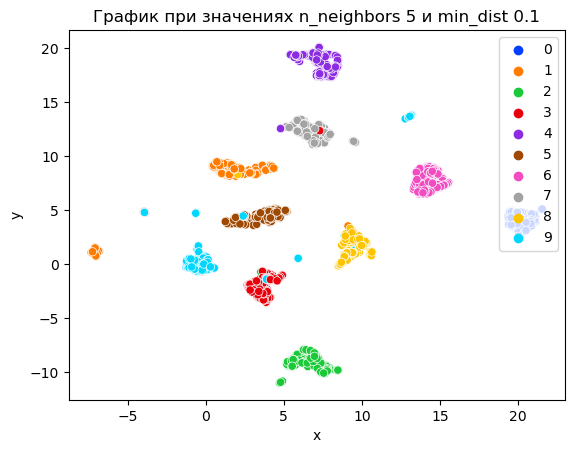

Рассчитано за 2.898972272872925 секунд 


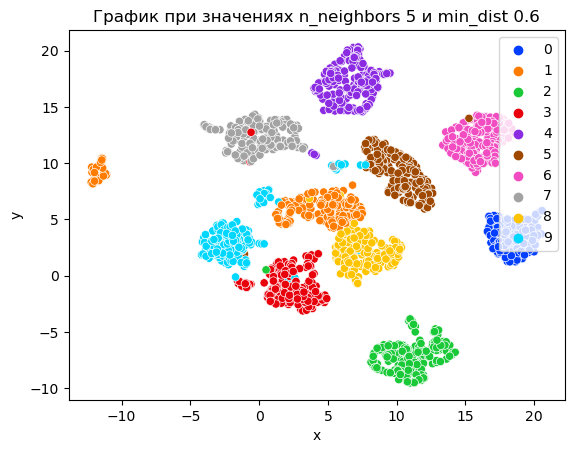

Рассчитано за 4.096421480178833 секунд 


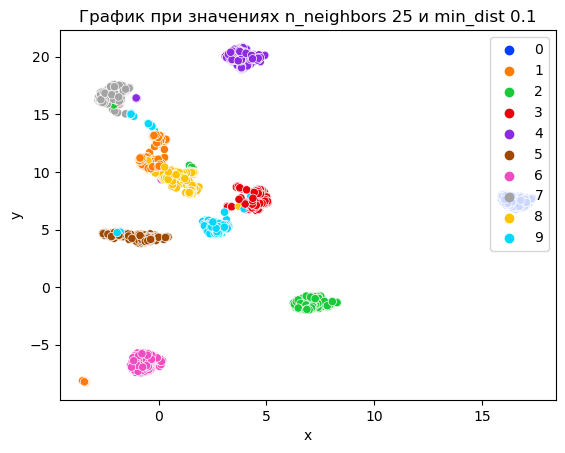

Рассчитано за 4.186689853668213 секунд 


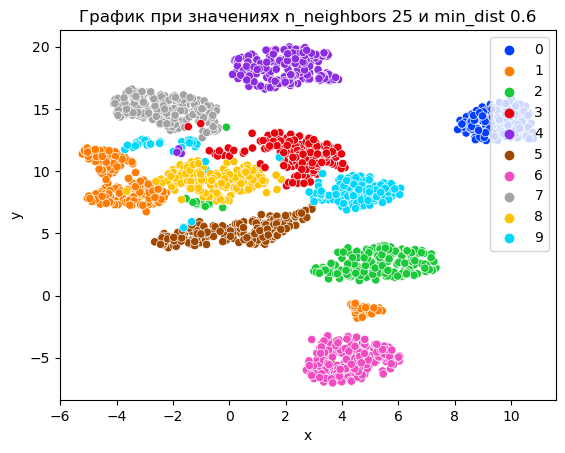

Рассчитано за 5.032394647598267 секунд 


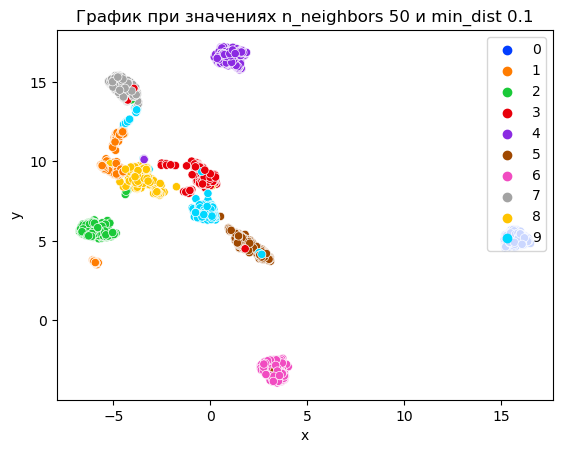

Рассчитано за 5.122661113739014 секунд 


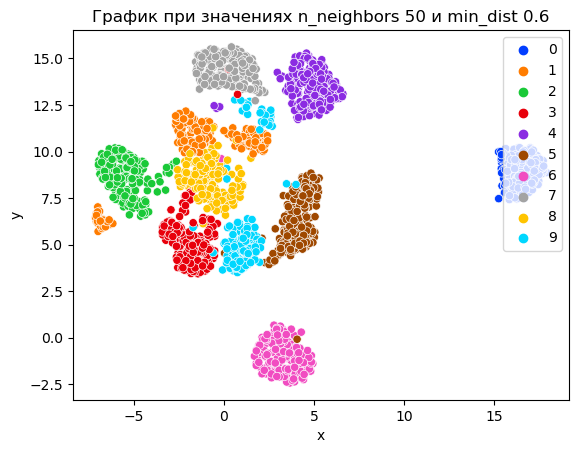

In [28]:
import umap
import time


n_neighbrs = [5,25,50]
min_d = [0.1,0.6]

um = dict()

scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(ds.data), columns=ds.data.columns)
D

def generate_u(n_neighbrs, min_d):
    U = umap.UMAP(n_neighbors=n_neighbrs, min_dist=min_d, random_state=123, n_jobs=1)
    UMAP_features = U.fit_transform(D)
    UMAP_features[1:4, :]
    return UMAP_features

for i in range(len(n_neighbrs)):
    for j in range(len(min_d)):
        start_time = time.time()
        UMAP_features = generate_u(n_neighbrs[i], min_d[j])
        print("Рассчитано за %s секунд " % (time.time() - start_time))
        Data = D.copy()
        Data['x'] = UMAP_features[:,0]
        Data['y'] = UMAP_features[:,1]

        fig_umap = plt.figure()
        sns.scatterplot(x='x', y='y', hue= ds.frame['target'], data=Data, palette='bright')
        plt.title("График при значениях n_neighbors {0} и min_dist {1}".format(n_neighbrs[i], min_d[j]))
        plt.legend(loc='upper right')
        plt.show()

